# TP1

## Dimitris Proios



## Requirements install 

In [1]:
import matplotlib.pyplot as plt
import numpy as np



## Exercise 1 -- Noise and Metrics

### 1.a) Write a function that determines the Mean Squared Error (MSE) between two images x and y.

In MSE, the lower the error, the more "similar" the two images are
The two images must have the same dimension.

- MSE definition 

$ MSE = \frac{1}{N M} \sum{ _{i=1} ^{N}  \sum{ _{i=1} ^{M} (x[i,j] - y[i,j]) ^2}}$ 



In [3]:

def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])	
	return err


Load 2 images to test functionality

In [ ]:
from PIL import Image
imA = Image.open('./data/hdr_images/img01.tif')
imA

In [44]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def readTifGrayScale(path):
    img = cv2.imread(path, -1)
    return img


def showTifGrayScale(img):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    

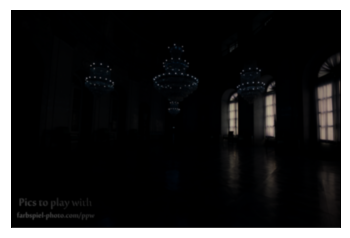

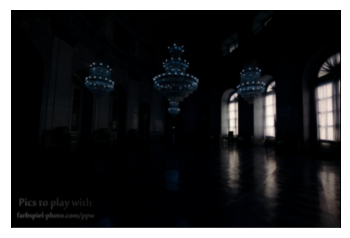

In [50]:
img1 = readTifGrayScale('./data/hdr_images/img01.tif')
img2 = readTifGrayScale('./data/hdr_images/img02.tif')
showTifGrayScale(img1)
showTifGrayScale(img2)


## 1.b)  Read in a new copy of the image cameraman.tif, keep it in its original datatype and range, i.e. uint8 and {0..255}.

In [52]:
imgCam = readTifGrayScale('./data/cameraman.tif')
imgCam



array([[156, 159, 158, ..., 151, 152, 152],
       [160, 154, 157, ..., 154, 155, 153],
       [156, 159, 158, ..., 151, 152, 152],
       ...,
       [114, 132, 123, ..., 135, 137, 114],
       [121, 126, 130, ..., 133, 130, 113],
       [121, 126, 130, ..., 133, 130, 113]], dtype=uint8)

### 1.c)  Now read in a second copy of the image cameraman.tif but map it to double and {0..1}. See Matlab im2double. Compare the two images using the MSE. Can you explain the result?

The mse is 17842.766630867263
which I believe is correct since the mse is not immune to different range.
### Notes 
- For numpy reference of types I used this documentation https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html
- For the replaccement of im2doublle function I used https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html 



In [9]:
imgCam_double = np.array(imgCam).astype("float64")
imgCam_double = np.interp(
    imgCam_double, 
    (imgCam_double.min(), imgCam_double.max()), 
    (0, 1)
)
imgCam_double 

array([[0.60569106, 0.61788618, 0.61382114, ..., 0.58536585, 0.58943089,
        0.58943089],
       [0.62195122, 0.59756098, 0.6097561 , ..., 0.59756098, 0.60162602,
        0.59349593],
       [0.60569106, 0.61788618, 0.61382114, ..., 0.58536585, 0.58943089,
        0.58943089],
       ...,
       [0.43495935, 0.50813008, 0.47154472, ..., 0.5203252 , 0.52845528,
        0.43495935],
       [0.46341463, 0.48373984, 0.5       , ..., 0.51219512, 0.5       ,
        0.43089431],
       [0.46341463, 0.48373984, 0.5       , ..., 0.51219512, 0.5       ,
        0.43089431]])

In [53]:
mse(imgCam_double, imgCam )


17842.766630867263

## Exercise 2 
### 2.a) Refractor the PNSR definition such that the PSNR is expressed as a function of the noise variance $σ_z ^2 $. You may assume that $σ_z ^2  = MSE(x, y)$ 

- PSNR original definition 
<br> 

(1) $ PSNR = 10 \log_{10} \frac{a^2}{MSE(x,y)} $ 
<br>

(2) $MSE(x,y) = \sigma _{z} ^2 $
<br>

(1) (2) $ PSNR = 10 \log_{10} \frac{a^2}{\sigma _{z} ^2} $ 
<br> 

 $ PSNR = 20 \log_{10} a - 10\log_{10}{\sigma _{z} ^2}  $ 
<br> 

 $ PSNR - 20 \log_{10} a  = 10\log_{10}{\sigma _{z} ^2}  $ 
<br> 

 $ \frac{PSNR - 20 \log_{10} a }{10} = \log_{10}{\sigma _{z} ^2}  $ 
<br> 

 (3) $ 10^ {\frac{PSNR - 20 \log_{10} a }{10}} = \sigma _{z} ^2  $ 

This relationship above is used in 2.b.



### 2.b) Add Gaussian noise to an image such that the PSNR ratio with the original image is 10dB, 20dB, 30dB and 40dB. Use randn, not imnoise.


In [74]:
import math 
PSNRs = [10, 20, 30, 40]
getVarianceForPSNR = lambda db: 10**((db-20 * math.log(255, 10))/10)
varianceList = [(db, getVarianceForPSNR(db)) for db in PSNRs ]
varianceList


[(10, 0.00015378700499807824),
 (20, 0.0015378700499807825),
 (30, 0.015378700499807824),
 (40, 0.1537870049980782)]

- Noise function:
$Z_i= N(\mu, \sigma ^2 )$


original image


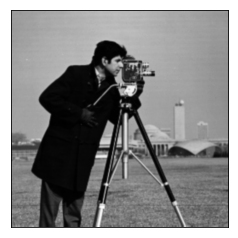

In [75]:
def gaussianNoise(image, var, mean = 0):
      row,col = image.shape
      sigma = var**0.5
      randomGaus = np.random.normal(mean,sigma,(row,col))
      gaussNoiseMatrix = randomGaus.reshape(row,col)
      noisy = image + gaussNoiseMatrix
      return noisy, gaussNoiseMatrix

imgCam = readTifGrayScale('./data/cameraman.tif')
imgCam_double = np.array(imgCam).astype("float64")
imgCam_double = np.interp(
    imgCam_double, 
    (imgCam_double.min(), imgCam_double.max()), 
    (0, 1)
)

print("original image")
showTifGrayScale(imgCam)


DB:  10
variance:  0.00015378700499807824
[[-0.00192994 -0.00782552  0.00707925 ...  0.02030436 -0.00143188
   0.00375879]
 [-0.00881183 -0.0243571   0.00031445 ... -0.01132731  0.00728761
   0.00271872]
 [-0.00610793 -0.02779751 -0.00308836 ...  0.00084614  0.01396084
   0.00183881]
 ...
 [-0.00468155 -0.01057091  0.01293747 ... -0.0116206   0.01228335
   0.0212174 ]
 [ 0.01993239 -0.00271396  0.01821326 ...  0.00705787 -0.01162408
  -0.01762495]
 [ 0.00134309  0.00312716  0.00896609 ...  0.00061844  0.00298668
  -0.01452366]]
DB:  20
variance:  0.0015378700499807825
[[-0.024097    0.03974763 -0.07871955 ...  0.01284653  0.01803954
   0.0170835 ]
 [ 0.01286372  0.01499168 -0.03486623 ...  0.07134585 -0.022291
  -0.02057155]
 [-0.03554821 -0.03644168  0.00934653 ...  0.06660712  0.0006981
   0.03492928]
 ...
 [ 0.03111999 -0.03125947  0.08735458 ...  0.03182652 -0.01673402
  -0.00984108]
 [-0.01901889 -0.01197688 -0.0061367  ... -0.05133818  0.07243776
  -0.00912586]
 [-0.04630521 -0.0

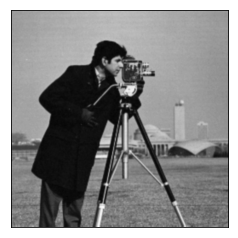

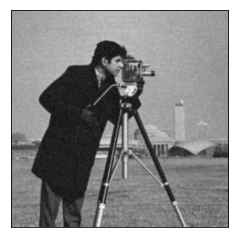

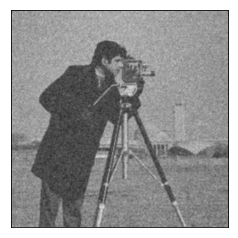

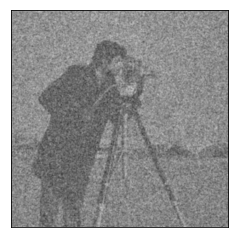

In [87]:
def experiment(db, variance, img):
    print("DB: ",db)
    print("variance: ", variance)
    noisedImgArray, gaussNoiseMatrix = gaussianNoise(img, variance)
    print(gaussNoiseMatrix)
    showTifGrayScale(noisedImgArray)
    return noisedImgArray
    
noised_images = [experiment(db,var, imgCam_double ) for db,var in iter(varianceList)]


In [85]:
[print (db,var ) for db,var in iter(varianceList)]


10 0.00015378700499807824
20 0.0015378700499807825
30 0.015378700499807824
40 0.1537870049980782


[None, None, None, None]

### 2.c) Show the noisy images on the screen. How do they look?

They look bad the more db we have 

### 2.d) Show the histograms for these noisy images, can you explain what you see?


In [15]:
import IPython.display 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('10.jpg',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

[ np.histogram(im[1],256,[0,256]) for im in noised_images]




AttributeError: 'NoneType' object has no attribute 'ravel'